INSTRUCTION: Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.

The [IMDb dataset](https://developer.imdb.com/non-commercial-datasets/) is available online.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_theme(context='notebook', font_scale=1.2, style='white', palette='deep')

In [4]:
# Load datasets

# CMU dataset
cmu_summaries = pd.read_csv('data/MovieSummaries/plot_summaries.txt', sep='\t')
cmu_names = pd.read_csv('data/MovieSummaries/name.clusters.txt', sep='\t')
cmu_movies = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t')
cmu_characters = pd.read_csv('data/MovieSummaries/character.metadata.tsv', sep='\t')
cmu_tvtropes = pd.read_csv('data/MovieSummaries/tvtropes.clusters.txt', sep='\t')

# IMDb dataset
imdb_people = pd.read_csv('data/IMDb/name.basics.tsv', sep='\t', na_values=['\\N'])
imdb_info = pd.read_csv('data/IMDb/title.basics.tsv', sep='\t', na_values=['\\N'])
imdb_principals = pd.read_csv('data/IMDb/title.principals.tsv', sep='\t', na_values=['\\N'])
imdb_ratings = pd.read_csv('data/IMDb/title.ratings.tsv', sep='\t', na_values=['\\N'])

/var/folders/rw/zplflm8s0mg64xxntr1x_bdr0000gn/T/ipykernel_5034/1312304838.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_info = pd.read_csv('data/IMDb/title.basics.tsv', sep='\t', na_values=['\\N'])


# IMDb dataset

## Who are the people that we have?

In the `people` dataframe, we have info of 12M persons from actors and directors to makeup artists.

We can use this dataframe to get general info about people.

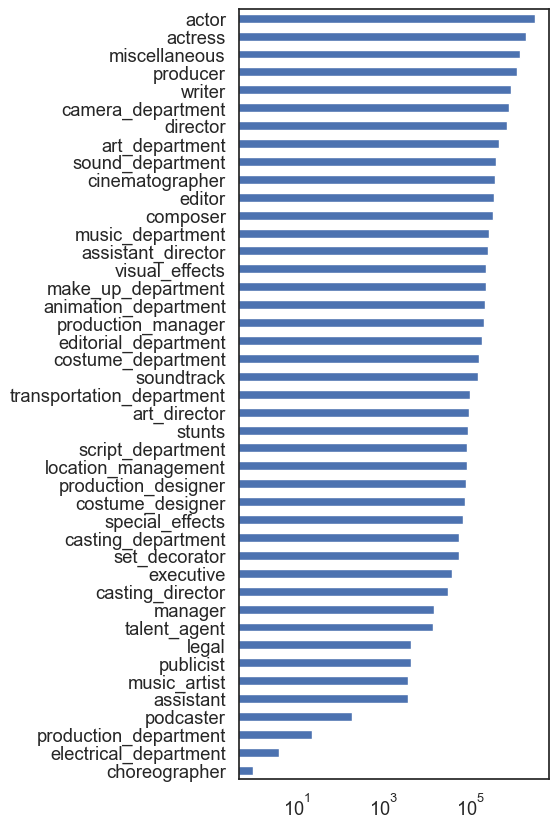

In [44]:
fig = plt.figure(figsize=(4, 10))
ax = fig.add_axes(111)

(imdb_people.primaryProfession
    .str.split(',', expand=True)
    .stack(dropna=True)
    .value_counts(ascending=True)
).plot.barh(
    ax=ax,
)

ax.set(
    xscale='log'
);

In the `principals` dataframe, we have the people involved in each movie and we can easily use it to find collaborations between people.

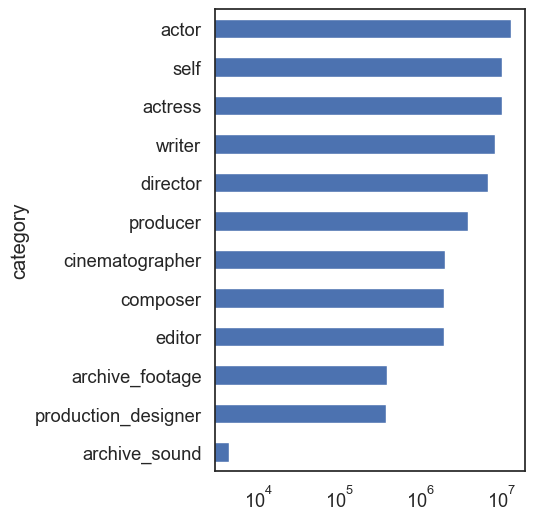

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 6))

imdb_principals.category.value_counts(ascending=True).plot.barh(
    ax=ax,
)

ax.set(
    xscale='log'
);

In total, 58M roles for 9.2M movies are reported which includes 5M distinct persons.

Around 3M of movies have 10 roles recorded.

Around 1M of individuals involved have at least 5 recorded projects and around 640k have at least 10 recorded projects.

We conclude that collaborations can be easily detected among people.

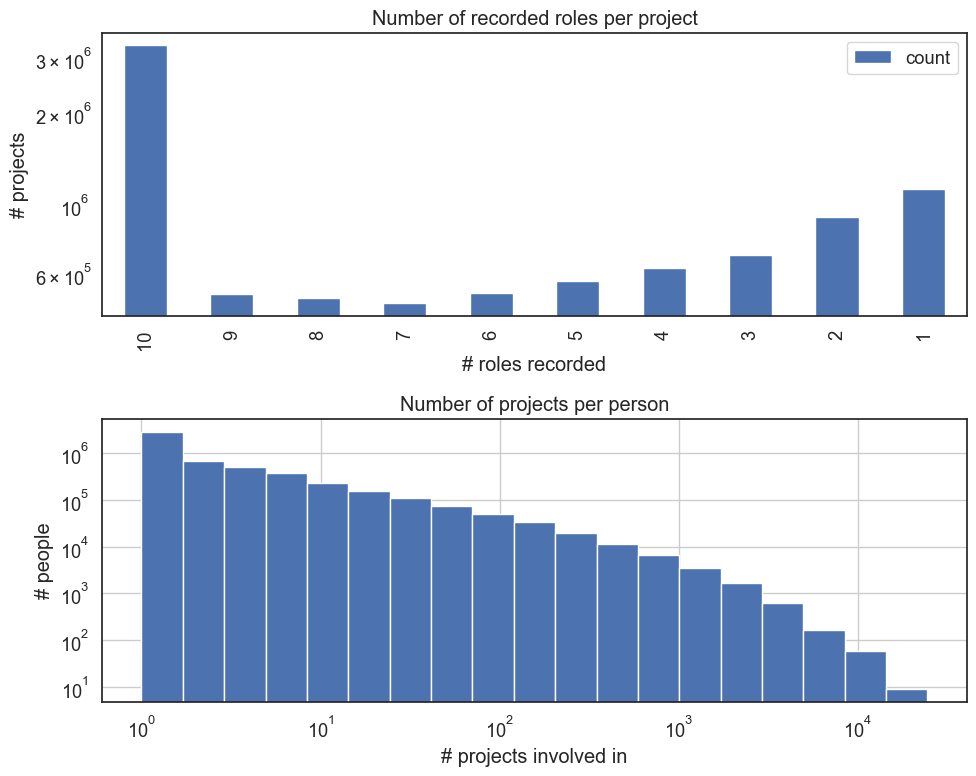

In [75]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# CHECK: The drop from 10 to 9 is a bit suspicious, to be clarified later.
df = imdb_principals
category = None

# Filter the dataframe
if category:
    df = df.query('category==@category')

# Plot
df1 = df.groupby(by='tconst').nconst.count().value_counts().sort_index(ascending=False).reset_index()
df1.plot.bar(
    x='nconst', y='count',
    ax=axs[0],
)
df2 = df.groupby(by='nconst').tconst.count()
df2.hist(
    bins=np.logspace(np.log10(1), np.log10(df2.max()), 20),
    ax=axs[1],
)

# Settings
axs[0].set(
    title='Number of recorded roles per project',
    xlabel='# roles recorded',
    ylabel='# projects',
    yscale='log',
);
axs[1].set(
    title='Number of projects per person',
    xlabel='# projects involved in',
    ylabel='# people',
    xscale='log',
    yscale='log',
);
fig.tight_layout()

## Some insightful statistics

There are 36 individuals who were involved in at least TEN THOUSAND movies!!

There are 17 individuals who were involved in at least 5k movies as PRODUCER.

In [91]:
# Find the influential people
s = imdb_principals.groupby(by='nconst').tconst.count()
influential_people = imdb_people[imdb_people.nconst.isin(s[s >= 10_000].index)]
influential_people

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1466,nm0001468,David Letterman,1947.0,NaN,"writer,producer,actor","tt0083441,tt0119951,tt0115641,tt0106053"
21333,nm0022172,Ernesto Alonso,1917.0,2007.0,"producer,director,actor","tt0324716,tt0324763,tt0324817,tt0373619"
65234,nm0068347,Lee Phillip Bell,1928.0,2020.0,"writer,producer,director","tt0047736,tt0069658,tt0092325,tt1539102"
65464,nm0068589,William J. Bell,1927.0,2005.0,"writer,producer,miscellaneous","tt0069658,tt0058796,tt0057731,tt0092325"
237870,nm0251041,Michael Egizi,NaN,NaN,"composer,music_department,soundtrack","tt0435721,tt0430836,tt0247094,tt0230831"
381708,nm0403568,Doris Hursley,1898.0,1984.0,"writer,producer","tt0047756,tt0056758,tt0048858,tt0063879"
381709,nm0403569,Frank Hursley,1902.0,1989.0,"writer,producer","tt0047756,tt0056758,tt0063879,tt0048858"
388826,nm0411100,Kenjirô Ishimaru,1953.0,NaN,actor,"tt0218553,tt5607028,tt1473235,tt2210717"
414500,nm0438471,Ekta Kapoor,1975.0,NaN,"writer,producer,director","tt7147670,tt0278212,tt3911870,tt5323298"
414532,nm0438506,Shobha Kapoor,NaN,NaN,"producer,writer","tt4434004,tt5323298,tt0278212,tt1954206"


Many of these people are in Bollywood. Is there a hidden mafia in bollywood...?

**Question: Is there a distribution shift in the success of the projects that these people participated in?**

### What is the content of `job` for each category?

This column seems to be inconsistent and redundant for our purposes.

In [185]:
# valcounts = imdb_principals.groupby('category').job.value_counts(dropna=False)

# for category in imdb_principals.category.unique():
#     print('--' * 50)
#     print(category)
#     print('--' * 50)
#     print(valcounts[(category,)])

# CMU Dataset

# Merge dataframes

### How can we use summaries or character details with this idea?

The goal of building the graph is finding:
    1. Influential individuals
    2. Clusters

Once these two are found, we can take projects of people within clusters or projects of influential people and analyze them in any sense:
- Analyze the similarity of plots.
- Analyze the persona in the clusters within the graph.
- Analyze the success of the movie (awards, box office, ratings).
- ...

### Is it feasible to merge the two datasets? Will we lose so many movies?

### Is it feasible to build the graph? The adjacency matrix will be 5Mx5M ...

# Define the edge weights

# Build the graph

# Address research questions

# For after Friday

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

* That you can handle the data in its size.
* That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
* That you considered ways to enrich, filter, transform the data according to your needs.
* That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
* That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.
